## 선형대수학 스터디
**작성자:** 구재영 \
**교재명:** 개발자를 위한 실전 선형대수학 \
**CH7 역행렬:** 행렬 방정식의 만능 키

### 연습문제 7-3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(42)

In [2]:
# Manual algorithm to compute inverse of a 2*2 matrix

def inverse_mat(a, b, c, d):
    
    # Create 2*2 matrix
    matrix = np.array([[a, b], [c, d]])
    
    # Calculate the determinant
    det = a * d - b * c
    
    if det == 0:
        return "The matrix is singular. A singular matrix does not have an inverse."
    
    # Calculate the inverse
    inverse = (1 / det) * np.array([[d, -b], [-c, a]])
    
    return inverse

In [3]:
# Check if the algorithm is constructed correctly

a, b, c, d = 1, 2, 3, 4
inverse = inverse_mat(a, b, c, d)
print(f'* Manual Algorithm\n{inverse}\n')
print(f'* Python Function\n{np.linalg.inv(np.array([[1, 2], [3, 4]]))}')

* Manual Algorithm
[[-2.   1. ]
 [ 1.5 -0.5]]

* Python Function
[[-2.   1. ]
 [ 1.5 -0.5]]


### 연습문제 7-4

In [4]:
# Generating a wide random matrix
A = np.random.randint(-10, 11, size=(3, 6))

# Checking if the matrix has full row rank
print(f'The rank of the matrix A: {np.linalg.matrix_rank(A)}')

The rank of the matrix A: 3


In [5]:
# Creating a square matrix by multiplying A with its transpose
AtA = A @ A.T

# Checking if the square matrix has an inverse by calculating it
AtA_inv = np.linalg.inv(AtA)
AtA_inv

array([[0.00494725, 0.0002989 , 0.00129729],
       [0.0002989 , 0.00438821, 0.00018763],
       [0.00129729, 0.00018763, 0.00391434]])

In [6]:
# Right inverse of A
right_inv = A.T @ AtA_inv
right_inv

array([[-0.02487646, -0.01931134, -0.01768272],
       [ 0.0365381 ,  0.03629472, -0.01813806],
       [ 0.0327619 ,  0.00307193,  0.04433258],
       [-0.01167562, -0.00168869, -0.03522907],
       [-0.01055546,  0.04317304,  0.0018988 ],
       [ 0.04089373, -0.02866664, -0.00791223]])

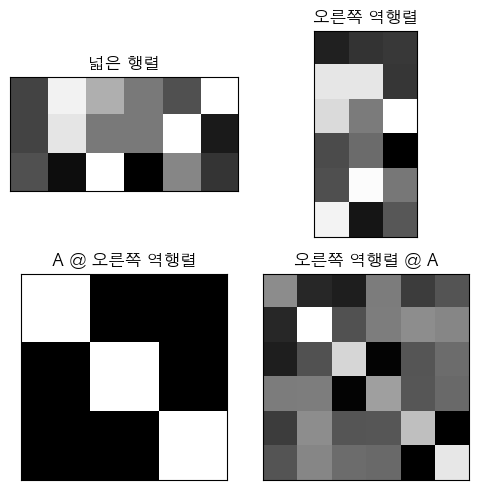

In [7]:
# Visualizing the matrices
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

# Showing the original wide matrix
axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title('넓은 행렬')

# Showing the calculated right inverse
axs[0, 1].imshow(right_inv, cmap='gray')
axs[0, 1].set_title('오른쪽 역행렬')

# Showing A multiplied by its right inverse (should be close to identity)
axs[1, 0].imshow(A @ right_inv, cmap='gray')
axs[1, 0].set_title('A @ 오른쪽 역행렬')

# Showing the right inverse multiplied by A (non-identity behavior for non-square matrix)
axs[1, 1].imshow(right_inv @ A, cmap='gray')
axs[1, 1].set_title('오른쪽 역행렬 @ A')

# Removing axis ticks
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

# Final layout adjustments
plt.tight_layout()
plt.show()

### 연습문제 7-5

In [8]:
# Full inverse case
A = np.random.randn(3,3)

Ainv  = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)

Ainv, Apinv

(array([[-0.47639811,  6.84498924,  1.64859823],
        [-0.48950452,  6.93540847,  2.34992949],
        [-1.00441814,  8.47916445,  2.47088323]]),
 array([[-0.47639811,  6.84498924,  1.64859823],
        [-0.48950452,  6.93540847,  2.34992949],
        [-1.00441814,  8.47916445,  2.47088323]]))

In [9]:
# left inverse case
B = np.random.randn(6,3)    # high

BLeft = np.linalg.inv(B.T@B) @ B.T
Bpinv = np.linalg.pinv(B)

BLeft, Bpinv

(array([[-0.06501677, -0.07084149,  0.17182215, -0.15167649,  0.36752502,
         -0.16218317],
        [ 0.58390616,  0.0331553 , -0.25079526, -0.48778753, -0.52585819,
         -0.36434759],
        [ 0.55400577,  0.07894035, -0.12010717,  0.45312167, -0.02532177,
         -0.23925246]]),
 array([[-0.06501677, -0.07084149,  0.17182215, -0.15167649,  0.36752502,
         -0.16218317],
        [ 0.58390616,  0.0331553 , -0.25079526, -0.48778753, -0.52585819,
         -0.36434759],
        [ 0.55400577,  0.07894035, -0.12010717,  0.45312167, -0.02532177,
         -0.23925246]]))

In [10]:
# right inverse case
C = np.random.randn(3,6)    # wide

CRight = C.T @ np.linalg.inv(C@C.T)
Cpinv  = np.linalg.pinv(C)

CRight, Cpinv

(array([[ 0.15208559,  0.00824811,  0.09138142],
        [ 0.00916951,  0.18416557,  0.2965659 ],
        [-0.05438509, -0.36657182,  0.11004302],
        [-0.26344554,  0.24582479,  0.00611623],
        [-0.11226877,  0.061585  ,  0.04688451],
        [-0.00942396,  0.0980464 , -0.11278071]]),
 array([[ 0.15208559,  0.00824811,  0.09138142],
        [ 0.00916951,  0.18416557,  0.2965659 ],
        [-0.05438509, -0.36657182,  0.11004302],
        [-0.26344554,  0.24582479,  0.00611623],
        [-0.11226877,  0.061585  ,  0.04688451],
        [-0.00942396,  0.0980464 , -0.11278071]]))

### 연습문제 7-9

In [11]:
import numpy as np
from scipy.linalg import hilbert

# hilbert matrix generation (w/ for loop)

def hilbert_matrix_for(n):
    H = np.zeros((n, n))
    for i in range(1, n+1):
        for j in range(1, n+1):
            H[i-1, j-1] = 1 / (i + j - 1)
    return H

In [12]:
# hilbert matrix generation (w/o for loop)

def hilbert_matrix_vectorized(n):
    i, j = np.meshgrid(np.arange(1, n+1), np.arange(1, n+1))
    H = 1 / (i + j - 1)
    return H

In [13]:
# hilbert matrix geneartion (scipy library)

print("Hilbert Matrix with for loop:")
print(hilbert_matrix_for(5))
print("\nHilbert Matrix with for vector calculation:")
print(hilbert_matrix_vectorized(5))
print("\nHilbert Matrix with Scipy library:")
print(hilbert(5))

Hilbert Matrix with for loop:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

Hilbert Matrix with for vector calculation:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

Hilbert Matrix with Scipy library:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


In [14]:
hilbert_matrix_for(5) == hilbert_matrix_vectorized(5), hilbert_matrix_vectorized(5) == hilbert(5)

(array([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]),
 array([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]))

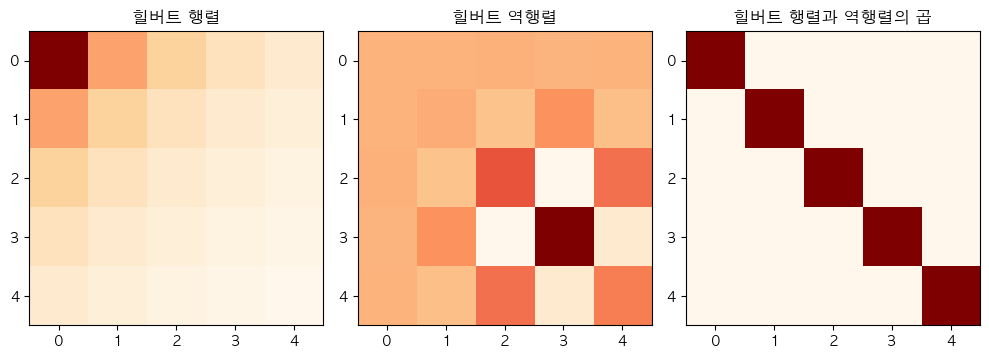

In [15]:
# Plotting

H = hilbert_matrix_for(5)
Hi = np.linalg.inv(H)

fig, axs = plt.subplots(1, 3, figsize=(10, 8))
h = [0, 0, 0]


h[0] = axs[0].imshow(H, cmap='OrRd')
axs[0].set_title('힐버트 행렬')

h[1] = axs[1].imshow(Hi, cmap='OrRd')
axs[1].set_title('힐버트 역행렬')

h[2] = axs[2].imshow(H @ Hi, cmap='OrRd')
axs[2].set_title('힐버트 행렬과 역행렬의 곱')


plt.tight_layout()
plt.show()

### 연습문제 7-10

In [16]:
matrix_sizes = np.arange(3, 13)  # matrix size from 3*3 to 12*12

hilbert_distances = []
gaussian_distances = []
hilbert_condition_numbers = []
gaussian_condition_numbers = []

for n in matrix_sizes:
    
    # Hilbert Matrix
    H = hilbert(n)
    H_inv = np.linalg.inv(H)
    I = np.eye(n)
    
    hilbert_dist = np.sqrt(np.sum((H @ H_inv - I)**2))        # Uclidean distance
    hilbert_cond = np.linalg.norm(H) * np.linalg.norm(H_inv)  # Condition number
    hilbert_distances.append(hilbert_dist)
    hilbert_condition_numbers.append(hilbert_cond)
    
    # Gaussian random matrix
    G = np.random.randn(n, n)
    G_inv = np.linalg.inv(G)
    
    gaussian_dist = np.sqrt(np.sum((G @ G_inv - I)**2))        # Uclidean distance
    gaussian_cond = np.linalg.norm(G) * np.linalg.norm(G_inv)  # Condition number
    gaussian_distances.append(gaussian_dist)
    gaussian_condition_numbers.append(gaussian_cond)

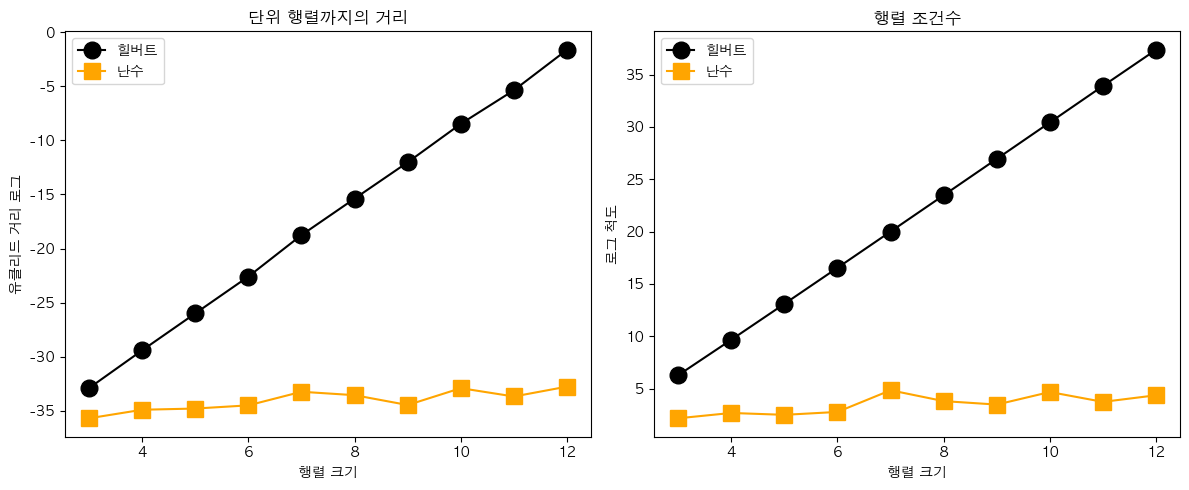

In [17]:
# Plotting

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Euclidean distance plot
axs[0].plot(matrix_sizes, np.log(hilbert_distances), color='black', label='힐버트', marker='o', markersize=12)
axs[0].plot(matrix_sizes, np.log(gaussian_distances), color='orange', label='난수', marker='s', markersize=12)
axs[0].set_title('단위 행렬까지의 거리')
axs[0].set_xlabel('행렬 크기')
axs[0].set_ylabel('유클리드 거리 로그')
axs[0].legend()

# Condition number plot
axs[1].plot(matrix_sizes, np.log(hilbert_condition_numbers), color='black', label='힐버트', marker='o', markersize=12)
axs[1].plot(matrix_sizes, np.log(gaussian_condition_numbers), color='orange', label='난수', marker='s', markersize=12)
axs[1].set_title('행렬 조건수')
axs[1].set_xlabel('행렬 크기')
axs[1].set_ylabel('로그 척도')
axs[1].legend()

plt.tight_layout()
plt.show()